<html>
<body>
<h1 style="background-color: #ccffdd; color :#009933 ;font-size:40px>  </h1>
<p style="background-color:tomato;"> Medical Cost Pediction Project.</p>
</body>
</html>

<span style="font-size:30px;background-color:#ffcccc; color :#ff0000">Import Libraries</span>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, boxcox
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import datetime
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
size=1338
%matplotlib inline

<span style="font-size:30px;background-color:#ffcccc; color :#ff0000">Upload Data</span>

In [45]:
# Loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('insurance.csv')

In [46]:
# First 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [48]:
# Number of rows and columns
df.shape

(1338, 7)

### Look !  Columns Meaning :

Charges : Individual medical costs billed by health insurance

---
Age : age of primary beneficiary

---
Sex : insurance contractor gender, female, male

---
Bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

---
Children : Number of children covered by health insurance / Number of dependents

---
Smoker : Smoking    

---

Region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

________________________________________________________________________________________________________________________




In [49]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
# Statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

### - Conclusion :

- Range of age is from 18 to 64 , data types is "int" .

- Range of Children is 0 to 5 , data type is "int" .

- Hence , we can concludes that there is no outliers in age and children column .

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------

<span style="font-size:30px;background-color:#ffcccc; color :#ff0000">First, Data Preprocessing </span>

<span style="font-size:20px;background-color:#e6e6ff; color :#0000e6">    - Dealing with missing values</span>

In [52]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There is no missing values   (الحمد لله)

<span style="font-size:20px;background-color:#e6e6ff; color :#0000e6">- Label Encoding </span>

- Categorical Datatype
  - Sex
  - Smoker
  - Region

In [53]:
gender = df.sex.values
set(gender)

{'female', 'male'}

In [54]:
smoker = df.smoker.values
set(smoker)

{'no', 'yes'}

In [55]:
region = df.region.values
set(region)

{'northeast', 'northwest', 'southeast', 'southwest'}

In [56]:
les = {}
for col in ['sex','smoker','region']:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<span style="font-size:20px;background-color:#e6e6ff; color :#0000e6"> - Outliers  </span>

In [58]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### 1- Age Outlier 

In [59]:
# Age
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
Q1, Q3

(27.0, 51.0)

In [60]:
IQR = Q3 - Q1
IQR

24.0

In [61]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-9.0, 87.0)

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

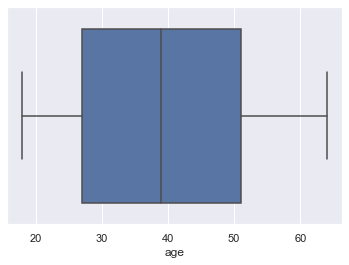

In [62]:
sns.boxplot(df['age'])

#### 2- Bmi Outlier :

In [63]:
# Bmi
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
Q1, Q3

(26.29625, 34.69375)

In [64]:
IQR = Q3 - Q1
IQR

8.3975

In [65]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(13.7, 47.290000000000006)

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bmi'>

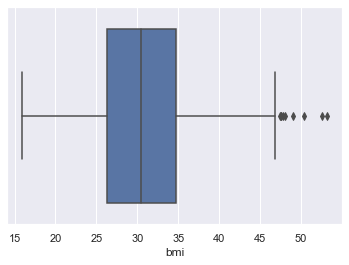

In [66]:
sns.boxplot(df['bmi'])

In [67]:
df[df['bmi'] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


#### 3- Children Outlier 

In [68]:
# Children
Q1 = df.children.quantile(0.25)
Q3 = df.children.quantile(0.75)
Q1, Q3

(0.0, 2.0)

In [69]:
IQR = Q3 - Q1
IQR

2.0

In [70]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-3.0, 5.0)

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='children'>

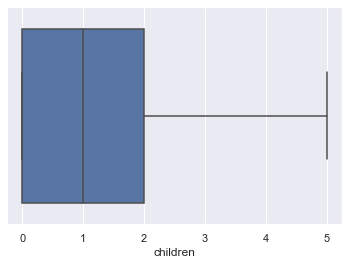

In [71]:
sns.boxplot(df['children'])

### - Conclusion :

- Number of columns with outliers is 9 only in because of bmi attribute .
- So , It will not affect if we drop them

In [72]:
df_new = df.drop(df.index[[116,401,286,543,847,860,1047,1088,1317]])

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\RUN8\.vscode\exte

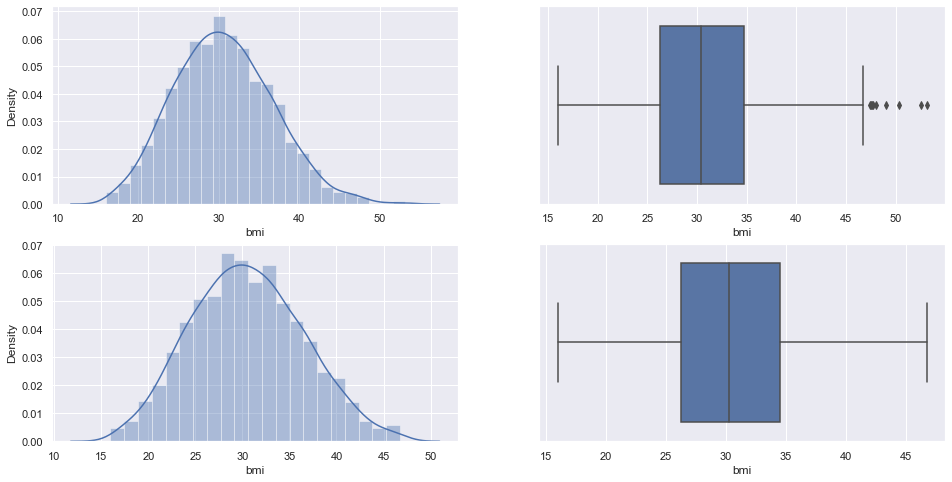

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['bmi'])
plt.subplot(2,2,2)
sns.boxplot(df['bmi'])
plt.subplot(2,2,3)
sns.distplot(df_new['bmi'])
plt.subplot(2,2,4)
sns.boxplot(df_new['bmi'])
plt.show()

- So we can delete outliers . . . 

<span style="font-size:20px;background-color:#e6e6ff; color :#0000e6">- Split data</span>

- Splitting the Features and Target
- *Splitting* the data into Training data & Testing Data


We need to split this
data set into two separate sets
input and output ( Prediction )

In [74]:
X = df.drop("charges",axis=1)
Y = df.charges
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [75]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


<span style="font-size:30px;background-color:#ffcccc; color :#ff0000">Second, Data Visulization</span>

In [76]:
# Gender,Smoker,Region column
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Gender','Smoking','Region'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"}] ,
           [None                               ,{"type": "pie"}]            ,                                      
          ]
    )
fig.add_trace(
    go.Pie(values=df_new.sex.value_counts().values,labels=['<b>Male<b>','<b>Female<b>'],hole=0.3,pull=[0,0.1]),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values=df_new.smoker.value_counts().values,labels=['<b>No<b>','<b>Yes<b>'],hole=0.3,pull=[0,0.1]),
    row=1, col=2
)
fig.add_trace(
    go.Pie(values=df_new.region.value_counts().values,labels=['<b>Southeast<b>','<b>Northwest<b>','<b>Southwest<b>','<b>Northeast<b>'],hole=0.3,pull=[0,0.1]),
    row=2, col=2
)
fig.update_layout(
    height=500,
    showlegend=True,
    title_text="<b>Distribution<b>",
)
fig.show()

In [77]:
# Children Distribution
fig = make_subplots(rows=1, cols=1)

tr1=go.Histogram(x=df_new['children'],name='Dependent count Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.update_layout(height=700, width=1200, title_text="Children Distribution (y = count , x = age)")
fig.show()

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



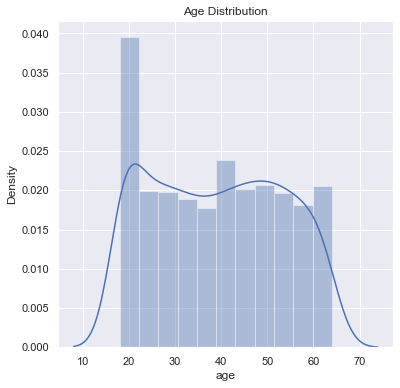

In [78]:
# Age Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_new['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



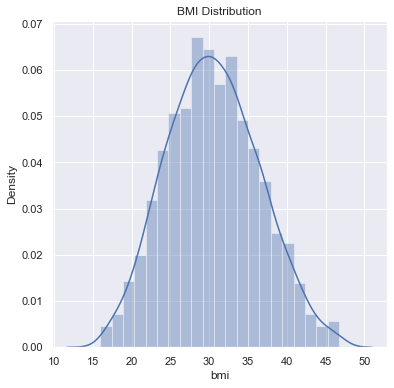

In [82]:
# BMI distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_new['bmi'])
plt.title('BMI Distribution')
plt.show()

In [83]:
df_new['children'].value_counts()

0    571
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\RUN8\.vscode\extensions\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Charges')

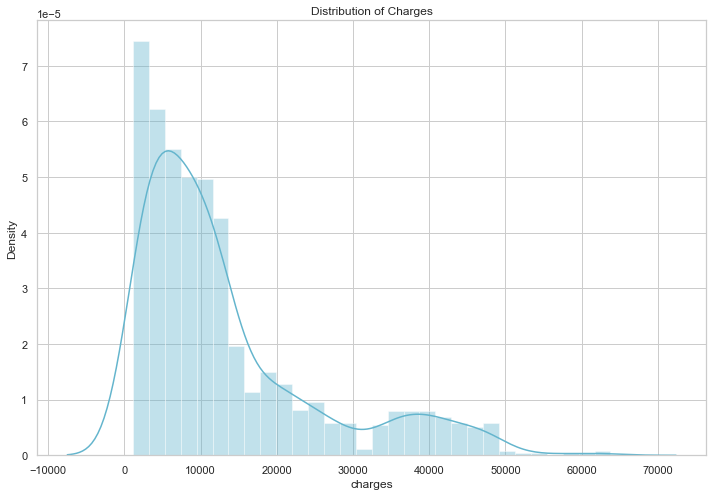

In [84]:
# Charges Distribution
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')